# Data gathering

In [1]:
import pandas as pd

In [2]:
# reading the datasets
fake = pd.read_csv('datasets/Fake News Detection Datasets/News _dataset/Fake.csv')
true = pd.read_csv('datasets/Fake News Detection Datasets/News _dataset/True.csv')

print('the shape of the fake dataset is: ', fake.shape)
print('the shape of the true dataset is: ', true.shape)

the shape of the fake dataset is:  (23481, 4)
the shape of the true dataset is:  (21417, 4)


In [3]:
# Add a column to each dataframe to indicate whether the news is fake or not
fake['label'] = 1
true['label'] = 0


In [4]:
# Combine the two dataframes
data = pd.concat([fake, true], ignore_index=True)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

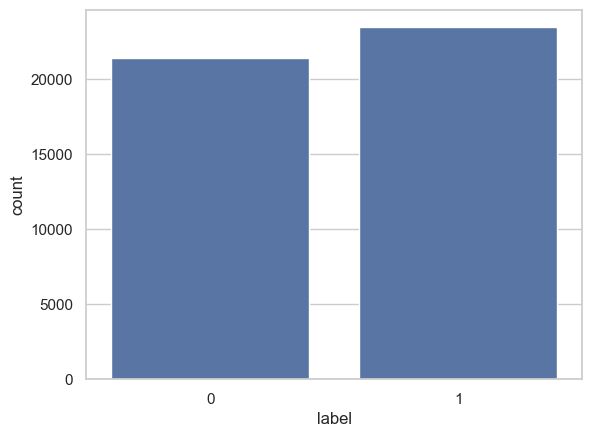

In [6]:
# Plotting the distribution of the labels
sns.set(style="whitegrid")
sns.countplot(x='label', data=data)
plt.show()


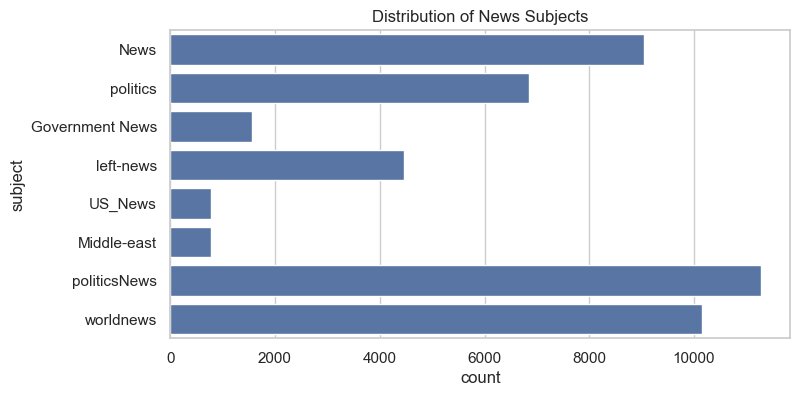

In [7]:
# plot the distribution of the news subjects
plt.figure(figsize=(8, 4))
sns.countplot(y=data['subject'])
plt.title('Distribution of News Subjects')
plt.show()

# Data cleaning

In [8]:
data = pd.read_csv('datasets/fake_news_data.csv')

In [9]:
# reset the index
data.reset_index(drop=True, inplace=True)

In [10]:
# check for missing values
print(data.isnull().sum())

text     131
label      1
dtype: int64


In [11]:
# drop the missing values
data = data.dropna()

In [12]:
# check for empty strings
blanks = []
for index, text in data['text'].items():
    
    if text.isspace():
        blanks.append(index)
    

print('the number of empty strings is: ', len(blanks))


the number of empty strings is:  1483


In [13]:
# drop the empty strings
data.drop(blanks, inplace=True)

In [14]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re

In [15]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [16]:
#creating list of stopwords containing stopwords from spacy and nltk

#stopwords of spacy
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print(len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
179
382


In [17]:
#text cleaning function
def clean_text(text):  
    string = ""
    
    #lower casing
    text=text.lower()
    
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    text=re.sub(r"n't"," not",text)
    
    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)
    
    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lemon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
#cleaning the data
data["text"]=data["text"].apply(clean_text)

In [20]:
# get all the available values in the label column
data['label'].unique()

array(['1', '0', 'FALSE', 'pants-fire', 'barely-true', 'TRUE',
       'mostly-true', 'half-true', 'full-flop', 'half-flip', 'no-flip',
       'bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state', 'Real', 'Fake'], dtype=object)

In [21]:

# converting the label column to a binary classification problem (1 for fake news and 0 for real news)

# replace the words true, mostly-true, Real, half-true with 0
data['label'] = data['label'].replace(['TRUE', 'mostly-true', 'Real', 'half-true'], 0)

# replace the words false, FALSE, barely-true, full-flop, fake, bs,junksci, Fake with 1
data['label'] = data['label'].replace(['FALSE', 'barely-true', 'full-flop', 'fake', 'bs', 'junksci', 'Fake'], 1)

# delete the rows with the values pants-fire, half-flip, no-flip, bias, conspiracy, satire, hate, state
data = data[~data['label'].isin(['pants-fire', 'half-flip', 'no-flip', 'bias', 'conspiracy', 'satire', 'hate', 'state'])]

# convert the label column to integer
data['label'] = data['label'].astype(int)



In [22]:
data.shape

(143002, 2)

# Feature-Extraction & Model building

In [23]:
#splitting the data 
from sklearn.model_selection import train_test_split


X=data["text"] #feature 
y=data["label"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [25]:
text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
model = text_clf.fit(X_train,y_train)

In [26]:
#making prediction using the model
predictions=model.predict(X_test)


# Evaluating the model

In [27]:
# the classification report
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     12985
           1       0.94      0.95      0.94     15616

    accuracy                           0.94     28601
   macro avg       0.94      0.94      0.94     28601
weighted avg       0.94      0.94      0.94     28601



In [28]:
# the models accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9378343414565924


In [29]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[11953  1032]
 [  746 14870]]


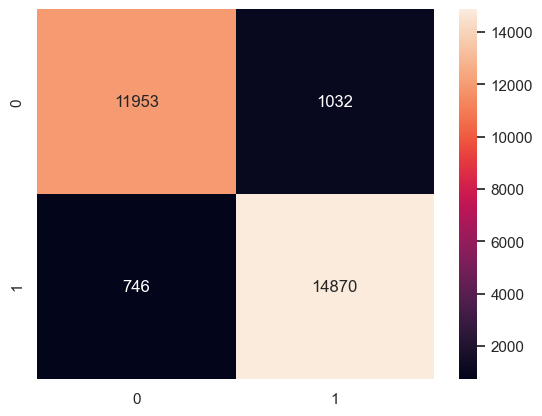

In [30]:
# plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


In [32]:

# saving the model
import joblib
joblib.dump(text_clf, 'models/fake_news_detection_model.pkl')

"""
# loading the model
model = joblib.load('fake_news_detection_model.pkl')
"""

"\n# loading the model\nmodel = joblib.load('fake_news_detection_model.pkl')\n"

# Testing the model

In [33]:
# testing the model

fake_news = "This might cause panic among users, but major platforms would likely issue official statements before complete shutdown. Be cautious of claims about social media disruptions."

print(model.predict([fake_news]))


[0]


In [34]:

real_news = "Major advancements are often newsworthy. Look for the company's press release or confirmation from credible financial news sources."

print(model.predict([real_news]))

[1]


In [35]:
# 10 fake news to test the model

fake_news = ["The government is planning to shut down the internet",
                "The president is dead",
                "The country is under attack",
                "The world is coming to an end",
                "The economy is collapsing",
                "The country is at war",
                "The president is missing",
                "The country is under lockdown",
                "The government is corrupt",
                "The country is in chaos"]

for news in fake_news:
    print(model.predict([news]))


[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [36]:
# 10 real news to test the model

real_news = ["The company is planning to launch a new product",
                "The company is expanding to new markets",
                "The company is hiring new employees",
                "The company is making profits",
                "The company is growing",
                "The company is investing in new technology",
                "The company is partnering with other companies",
                "The company is launching a new website",
                "The company is opening a new office",
                "The company is acquiring new customers"]

for news in real_news:
    print(model.predict([news]))

[1]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[1]


In [ ]:
news = "argentina has won the world cup final of 2022"

if model.predict([news]) == 1:
    print("The news is fake")
else:
    print("The news is real")

The news is fake
